# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

# Data

In [2]:
#data = pd.read_csv('E-commerce-data.xlsx', sep=',')
data = pd.read_excel('/content/drive/MyDrive/DataScience/PruebaSalida/E-commerce-data.xlsx')
data.head(3)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [4]:
data.describe()

,CustomerID,InvoieNo,Quantity,price per Unit,Price,Cancelled_status,Sold as set
count,404189.000000,537979.000000,537979.000000,537979.000000,537979.000000,8345.0,0.0
mean,2181.909035,385017.572063,9.343339,378.339062,2161.414593,1.0,NaN
std,1252.681881,13426.052649,27.623322,440.048823,4538.487177,0.0,NaN
min,2.000000,361429.000000,-2003.000000,1.000000,-10152.000000,1.0,NaN
25%,1207.000000,372961.000000,1.000000,169.000000,451.000000,1.0,NaN
50%,2078.000000,385706.000000,3.000000,261.000000,1194.000000,1.0,NaN
75%,3291.000000,396873.000000,10.000000,456.000000,2232.000000,1.0,NaN
max,4372.000000,406651.000000,3186.000000,64973.000000,90400.000000,1.0,NaN


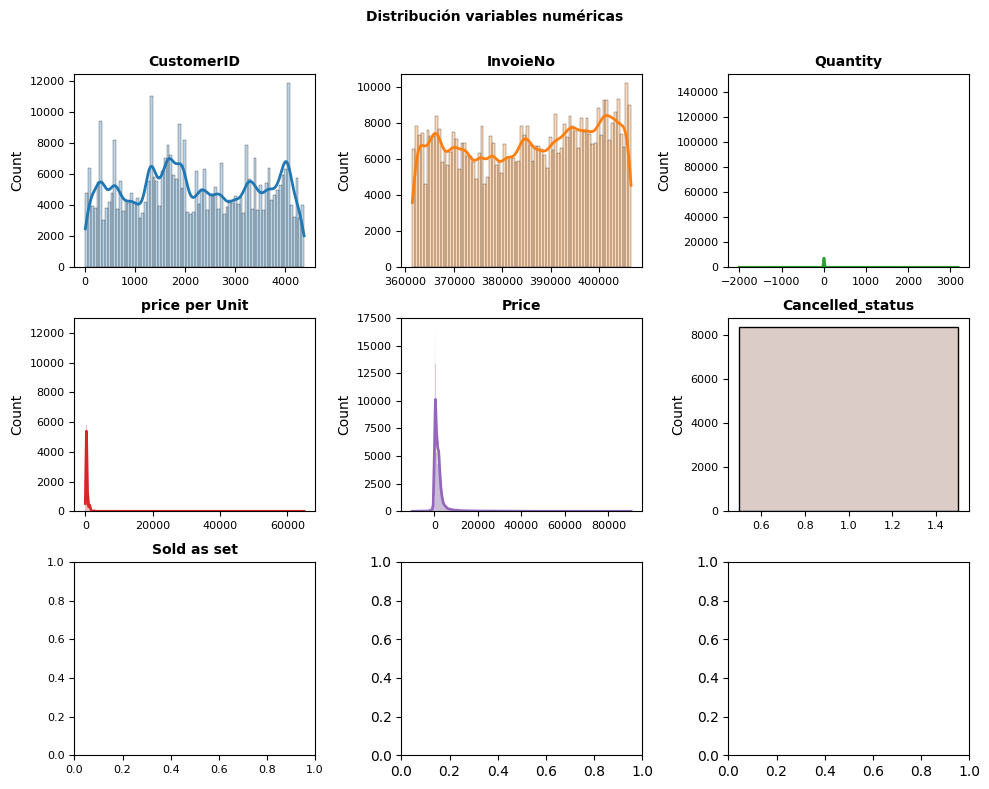

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,8))
axes = axes.flat
graphData = data.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(graphData):
    sns.histplot(
        data    = data,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

Se observan dos variables adicionales que no estan mencionadas en el archivo. Ademas la variable de interes solo esta completada con algunos datos. Y faltan datos en CustomerID.

# Preparando datos

In [9]:
#Eliminar variables sin valores
data = data.drop(['Reason of return', 'Sold as set'], axis= 1)
data.head(3)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN


In [10]:
#Completar la variable de interes
data['Cancelled_status'] = data['Cancelled_status'].fillna(0).replace('Verdadero', 1)
data['Cancelled_status'].value_counts()

0.0    529634
1.0      8345
Name: Cancelled_status, dtype: int64

In [11]:
#Observar datos nulos
data.isnull().sum()

CustomerID           133790
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status          0
dtype: int64

In [12]:
#Eliminar datos nulos
checkData = data.dropna()
checkData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404189 entries, 0 to 537949
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          404189 non-null  object        
 2   InvoieNo           404189 non-null  int64         
 3   Date of purchase   404189 non-null  datetime64[ns]
 4   Quantity           404189 non-null  int64         
 5   Time               404189 non-null  object        
 6   price per Unit     404189 non-null  float64       
 7   Price              404189 non-null  float64       
 8   Shipping Location  404189 non-null  object        
 9   Cancelled_status   404189 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 33.9+ MB


In [13]:
#Dividir la variable Date en varias variables por comodida
checkData['Year'] = checkData['Date of purchase'].dt.year
checkData['Month'] = checkData['Date of purchase'].dt.month
checkData['Day'] = checkData['Date of purchase'].dt.day

In [14]:
checkData

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Year,Month,Day
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,0.0,2017,10,29
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,0.0,2017,10,5
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,0.0,2017,10,12
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,0.0,2017,8,22
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,0.0,2017,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537945,37.0,14693,402292,2017-11-28,1,12:07:00,384.0,384.0,Location 8,0.0,2017,11,28
537946,37.0,14693,402292,2017-11-27,1,12:07:00,398.0,398.0,Location 8,0.0,2017,11,27
537947,21.0,77618,363890,2016-12-21,8,12:58:00,308.0,2464.0,Location 8,0.0,2016,12,21
537948,21.0,85194L,363890,2016-12-21,36,12:58:00,113.0,4068.0,Location 8,0.0,2016,12,21


In [15]:
#Encodear la variable location para obtener datos numericos
le = LabelEncoder()
checkData['Shipping Location'] = le.fit_transform(checkData['Shipping Location'])
checkData['Shipping Location'].value_counts()

15    376353
3       8316
10      6981
4       4265
0       2925
2       2257
16       744
9        586
6        517
5        403
17       174
7        172
13       132
19       111
11       103
1         95
12        33
18        18
8          2
14         2
Name: Shipping Location, dtype: int64

# Split

In [16]:
X = checkData.drop(['Cancelled_status', 'Item Code', 'Date of purchase', 'Time'], axis=1)
y = checkData['Cancelled_status']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

# Random Forest

In [18]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = rf.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MSE:{mse}")
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

MSE:0.0
Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     79234
         1.0       1.00      1.00      1.00      1604

    accuracy                           1.00     80838
   macro avg       1.00      1.00      1.00     80838
weighted avg       1.00      1.00      1.00     80838



# KNN

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9994185902669537


In [23]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     79234
         1.0       1.00      0.97      0.99      1604

    accuracy                           1.00     80838
   macro avg       1.00      0.99      0.99     80838
weighted avg       1.00      1.00      1.00     80838



# Validacion Cruzada

In [24]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

scores_rf = []
scores_knn = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf.fit(X_train, y_train)
    knn.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    y_pred_knn = knn.predict(X_test)

    accuracy_rf = accuracy_score(y_test, y_pred)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)

    scores_rf.append(accuracy_rf)
    scores_knn.append(accuracy_knn)

average_accuracy_rf = np.mean(scores_rf)
average_accuracy_knn = np.mean(scores_knn)

print(f'Mean Squared Error: {average_accuracy_rf}')
print(f'Mean Squared Error: {average_accuracy_knn}')

Mean Squared Error: 1.0
Mean Squared Error: 0.9993987960036869


# Concluciones

Ambos modelos predicen de manera correcta y muy similar con diferencias minimas.
Pero por la cantidad de datos desbalanceada, es probable que se necesiten preprocesamientos adicionales para llegar a obtener un buen modelamiento final.